In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdate
from matplotlib.pyplot import rcParams
from datetime import datetime 
import seaborn as sns

In [2]:
df = pd.read_excel('../../dataset/2021MCMProblemC_DataSet.xlsx')
df.describe()

,Latitude,Longitude
count,4424.000000,4424.000000
mean,47.622827,-121.789543
std,0.720164,1.459491
min,45.488689,-124.665014
25%,47.282470,-122.525919
50%,47.629840,-122.313741
75%,47.976590,-122.033495
max,49.548004,-116.873687


In [3]:
df1 = pd.read_excel('../../dataset/2021MCMProblemC_DataSet.xlsx',dtype='string')
df1.describe()
time1 = df1['Detection Date']
count1 = {}
for i in time1:
    count1[i] = 1 + count1.get(i,0)
for i in sorted(count1.items(),key=lambda x:x[0]):
    print(i)

('2007-01-20 00:00:00', 1)
('2010-02-20 00:00:00', 1)
('2010-04-20 00:00:00', 1)
('2010-09-04 00:00:00', 1)
('2011-01-20 00:00:00', 1)
('2011-04-20 00:00:00', 1)
('2011-05-20 00:00:00', 1)
('2011-07-20 00:00:00', 1)
('2011-08-20 00:00:00', 2)
('2011-09-25 00:00:00', 1)
('2012-06-08 00:00:00', 1)
('2012-06-09 00:00:00', 1)
('2012-07-19 00:00:00', 1)
('2012-07-20 00:00:00', 1)
('2012-08-01 00:00:00', 1)
('2013-07-02 00:00:00', 2)
('2013-08-31 00:00:00', 1)
('2014-04-24 00:00:00', 1)
('2015-04-07 00:00:00', 1)
('2015-05-03 00:00:00', 1)
('2015-06-10 00:00:00', 1)
('2015-07-20 00:00:00', 1)
('2015-08-20 00:00:00', 2)
('2016-06-20 00:00:00', 1)
('2016-07-01 00:00:00', 1)
('2016-07-14 00:00:00', 2)
('2016-08-01 00:00:00', 1)
('2016-08-25 00:00:00', 1)
('2017-01-20 00:00:00', 1)
('2017-06-01 00:00:00', 1)
('2017-06-26 00:00:00', 1)
('2017-09-20 00:00:00', 1)
('2018-02-25 00:00:00', 1)
('2018-04-22 00:00:00', 1)
('2018-05-26 00:00:00', 1)
('2018-06-04 00:00:00', 1)
('2018-06-08 00:00:00', 1)
(

In [4]:
time = df['Detection Date']
print('空缺值:'+str(time.isnull().sum()))


空缺值:0


In [5]:
count_year = {}
for i in time:
    count_year[i.year] = 1 + count_year.get(i.year,0)
# for i in sorted(count_year.items(),key=lambda x:x[1]):
#     print(i)
y=np.array(list(count_year.values()))
# y=y[-3:]+y[:-4].sum()
x=np.array(list(count_year.keys()))
print(x)
print(y)
print(y[-3:])
print(len(x),len(y))

[2007 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
[   1    3    7    5    3    1    6    6    4   21  129 4238]
[  21  129 4238]
12 12


In [6]:
count_month = {}
for i in time:
    if i.year not in [2007,2010 ,2011, 2012, 2013, 2014, 2015, 2016, 2017]:
        count_month[i.month] = 1 + count_month.get(i.month,0)
# for i in sorted(count_year.items(),key=lambda x:x[1]):
#     print(i)
y1=np.array(list(count_month.values()))
# y=y[-3:]+y[:-4].sum()
x1=np.array(list(count_month.keys()))
print(x1)
print(y1)
print(len(x1),len(y1))

[ 6  7  8  9  1  3  4  5 10 11 12  2]
[ 336 1018 1388  657    3   23  190  578  183    5    3    4]
12 12


In [7]:
lab=df['Lab Status']
print(lab.value_counts())
comment=df['Lab Comments']
print(len(df[df['Lab Comments']!=' ']))

Unverified     2327
Negative ID    2068
Unprocessed      15
Positive ID      14
Name: Lab Status, dtype: int64
2265


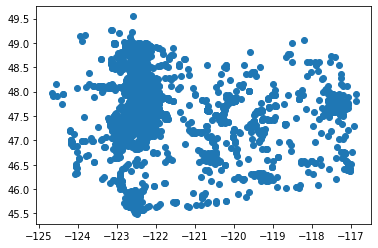

In [8]:
y=df['Latitude']
x=df['Longitude']
plt.scatter(x,y)
plt.show()

In [23]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics  #精度
y_pred=[1]*14+[2]*2068  #预测
y_true=[1]*13+[2]+[1]*318+[2]*1750   #真实
# C=confusion_matrix(y_true, y_pred, labels=['positive','negative'])
# df=pd.DataFrame(C,index=['positive','negative'],columns=['positive','negative'])
# sns.heatmap(df,annot=True,fmt='g')
print('The accuracy-score of the GradientBoostingClassifier is', metrics.accuracy_score(y_pred, y_true))
print('The recall-score of the GradientBoostingClassifier is', metrics.recall_score(y_pred, y_true))
print('The f1-score of the GradientBoostingClassifier is', metrics.f1_score(y_pred,y_true))

The accuracy-score of the GradientBoostingClassifier is 0.8467819404418828
The recall-score of the GradientBoostingClassifier is 0.9285714285714286
The f1-score of the GradientBoostingClassifier is 0.0753623188405797
